In [1]:
"""
Verschiedene MLM 
Classifiers:
- Trees
- Ensemble Learning
- Naiver Bayes
- SVM
- Clustering
- Neural Network
- KNN
"""

'\nVerschiedene MLM \nClassifiers:\n- Trees\n- Ensemble Learning\n- Naiver Bayes\n- SVM\n- Clustering\n- Neural Network\n- KNN\n'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [3]:
url = 'https://raw.githubusercontent.com/Redra1ner/csv4datascience2/main/bodyPerformance.csv'
df = pd.read_csv(url, index_col=0)
print(df.head(5))

     gender  height_cm  weight_kg  body fat_%  diastolic  systolic  gripForce  \
age                                                                             
27.0      M      172.3      75.24        21.3       80.0     130.0       54.9   
25.0      M      165.0      55.80        15.7       77.0     126.0       36.4   
31.0      M      179.6      78.00        20.1       92.0     152.0       44.8   
32.0      M      174.5      71.10        18.4       76.0     147.0       41.4   
28.0      M      173.8      67.70        17.1       70.0     127.0       43.5   

      sit and bend forward_cm  sit-ups counts  broad jump_cm class  
age                                                                 
27.0                     18.4            60.0          217.0     C  
25.0                     16.3            53.0          229.0     A  
31.0                     12.0            49.0          181.0     C  
32.0                     15.2            53.0          219.0     B  
28.0              

In [4]:
url = 'https://raw.githubusercontent.com/Redra1ner/csv4datascience2/main/bodyPerformance.csv'
df = pd.read_csv(url, index_col=0)
np.sort(df['class'].unique())

df = df.replace({'gender':{'M':3 , 'F':1},\
                                    'class':{'A':1, 'B':2, 'C':3, 'D':4}})

df= df.rename(index=str, columns={"class": "classification"})

testSize=0.2

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13393 entries, 27.0 to 34.0
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   13393 non-null  int64  
 1   height_cm                13393 non-null  float64
 2   weight_kg                13393 non-null  float64
 3   body fat_%               13393 non-null  float64
 4   diastolic                13393 non-null  float64
 5   systolic                 13393 non-null  float64
 6   gripForce                13393 non-null  float64
 7   sit and bend forward_cm  13393 non-null  float64
 8   sit-ups counts           13393 non-null  float64
 9   broad jump_cm            13393 non-null  float64
 10  classification           13393 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 1.2+ MB


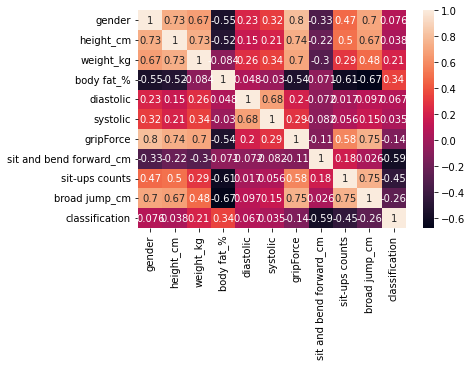

In [5]:
import seaborn as sn
import matplotlib.pyplot as plt

corr_matrix= df.corr()

sn.heatmap(corr_matrix, annot=True)
plt.show()

In [6]:
def plot_classifier(model, X, Z, proba=False, x_min=None,x_max=None,y_min=None,y_max=None):
 plt.set_cmap("coolwarm")
 if x_min is None:
  x_min = X[:, 0].min() - 1
 if x_max is None:
  x_max = X[:, 0].max() + 1
 if y_min is None:
  y_min = X[:, 1].min() - 1
 if y_max is None:
  y_max = X[:, 1].max() + 1
 xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),np.linspace(y_min, y_max, 500))
 if proba:
    zz = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    plt.imshow(zz.reshape(xx.shape),
    origin = "lower",
    aspect = "auto",
    extent = (x_min, x_max, y_min, y_max),
    vmin = 0,
    vmax = 1,
    alpha = 0.4)
 else:
    zz = model.predict(np.c_[xx.ravel(), yy.ravel()])
    plt.contourf(xx, yy, zz.reshape(xx.shape),
    alpha = 0.4,
    vmin = 0,
    vmax = 1)
    plt.scatter(X[:, 0], X[:, 1], c=Z, alpha=0.8, s=20)

In [7]:
def run_algo_on_data(X, y, algo_class, algo_name, **params):
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)
    algo = algo_class(**params)
    algo.fit(train_X, train_y)
    r2_train = algo.score(train_X, train_y)
    y_predicted = algo.predict(test_X)
    accuracy = accuracy_score(test_y, y_predicted)
    print('r^2 on training data for', algo_name, '{:.2f}'.format(r2_train))
    print('Accuracy score for', algo_name, '{:.2f}'.format(accuracy))
    print('---'*10)

In [8]:
X0 = df.iloc[:,:-1]
y0 = df['classification']

run_algo_on_data(X0, y0, RandomForestClassifier, 'Random Forest Classifier')
run_algo_on_data(X0, y0, AdaBoostClassifier, 'AdaBoost Classifier')
run_algo_on_data(X0, y0, SVC, 'SVC')

r^2 on training data for Random Forest Classifier 1.00
Accuracy score for Random Forest Classifier 0.65
------------------------------
r^2 on training data for AdaBoost Classifier 0.58
Accuracy score for AdaBoost Classifier 0.57
------------------------------
r^2 on training data for SVC 0.58
Accuracy score for SVC 0.59
------------------------------


In [9]:
#Logistische Regression

X = df
X_train, X_test, y_train, y_test = train_test_split(X, df.classification, test_size=testSize)

# sklearn logisitic regression macht automatisch ein ONE-VS-ALL
model = LogisticRegression( multi_class="auto" )
model.fit(X_train, y_train)

model.score(X_test, y_test)

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5931317655841732

In [10]:
# ONE-VS-ONE

from sklearn.multiclass import OneVsOneClassifier

X = df
X_train, X_test, y_train, y_test = train_test_split(X, df.classification, test_size=testSize)

model = OneVsOneClassifier(LogisticRegression( multi_class="auto" ))
model.fit(X_train, y_train)

model.score(X_test, y_test)

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/python/envs/default/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

1.0

In [11]:
# Softmax mit setzen von multi_class (und solver)
X = df
X_train, X_test, y_train, y_test = train_test_split(X, df.classification, test_size=testSize)

model = LogisticRegression( solver="newton-cg", multi_class="multinomial")
model.fit(X_train, y_train)

model.score(X_test, y_test)

1.0

In [12]:
#Polynomial Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X = df.iloc[:, 0:9].to_numpy()
#'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic', 'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts', 'broad jump_cm'

y = df.classification

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testSize)

logistic = LogisticRegression()
scaler = StandardScaler()
pipeline = Pipeline([('scaler', scaler),('logistic', logistic)])
pipeline.fit(X_train, y_train)
scores = pipeline.score(X, y)
scores

0.5761218547002165

In [13]:
#KNN

from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import pandas as pd
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate

# Target
y = df.classification
y

X= df.iloc[:, 0:9].to_numpy()
#'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic', 'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts', 'broad jump_cm'
X

# score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np

# create KNN Model with k=1, fit and visualize
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

for k in range(1, 40, 2):
 knn = KNeighborsClassifier(n_neighbors=k)
 kf_repeat = RepeatedKFold(n_splits=10, n_repeats=2 )
 knn.fit(X, y)
 scores = cross_validate(knn, X, y, cv = kf_repeat, return_train_score=True)
 print(k, " ", np.mean( scores['train_score'] ), " / ", np.mean(scores['test_score']) )

1   1.0  /  0.5137005227781927
3   0.7312817011630413  /  0.5312475059355946
5   0.6903482115953472  /  0.5510353571946096
7   0.6724242147923879  /  0.5603297459676968
9   0.6594116383351992  /  0.5632054161604227
11   0.6499041857618206  /  0.5678721589959091
13   0.644067793273696  /  0.56966462497074
15   0.6394094715184914  /  0.5706709451250098
17   0.6366177948010193  /  0.5763839131452522
19   0.6334071923860536  /  0.5747419827672691
21   0.6297775851198437  /  0.575824434585846
23   0.6262931688895585  /  0.5758995351844215
25   0.6233272926632554  /  0.5772433203660563
27   0.623281634026895  /  0.5777268065943619
29   0.6216307225356686  /  0.5802671017578277
31   0.6198428719590626  /  0.5769422213057194
33   0.6182748932935175  /  0.5773175570987483
35   0.6157113617747487  /  0.5790691148440026
37   0.6135584726855756  /  0.5785100821508589
39   0.6121564391692897  /  0.5769052980058632


/opt/python/envs/default/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/python/envs/default/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be ac

In [14]:
#KNN Distance Weight

from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import pandas as pd

# Target
y = df.classification
y

X= df.iloc[:, 0:9].to_numpy()
#'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic', 'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts', 'broad jump_cm'
X

# Skalierung
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# visualise classification, k=7
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X, y)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X, y, cv = 20)
scores, np.mean( scores )

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/python/envs/default/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be ac

(array([0.55820896, 0.55820896, 0.59552239, 0.58208955, 0.56567164,
        0.59253731, 0.56119403, 0.59104478, 0.58059701, 0.56865672,
        0.55671642, 0.58208955, 0.55970149, 0.57249626, 0.54857997,
        0.58146487, 0.60687593, 0.57100149, 0.59342302, 0.57698057]),
 0.5751530464270574)

In [15]:
#Naiver Bayes

from sklearn import datasets

# Target
y = df.classification
y

X= df.iloc[:, 0:9].to_numpy()
#'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic', 'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts', 'broad jump_cm'
X

# Train-Test-Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testSize, shuffle=True)

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
gaussNB = GaussianNB()
gaussNB.fit(X_train, y_train)
scores=gaussNB.score( X_test, y_test )
print(scores)

0.5651362448674878


In [16]:
#SVM

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import numpy as np

# Target
y = df.classification

X= df.iloc[:, 0:9].to_numpy()
#'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic', 'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts', 'broad jump_cm'


import seaborn as sns
import matplotlib.pyplot as plt

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testSize)

# Bei Abständen: immer Skalieren
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ML Modell definieren und fit, SVC = Supported Vector Machine Classifier
from sklearn.svm import SVC
svm = SVC( kernel = "linear" )
svm.fit( X_train, y_train )
vars(svm)

print(svm.score( X_test, y_test ))

0.5890257558790594


In [17]:
#SVM mit Polynomialem Kernel

from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import numpy as np

# Target
y = df.classification

X= df.iloc[:, 0:9].to_numpy()
#'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic', 'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts', 'broad jump_cm'


import seaborn as sns
import matplotlib.pyplot as plt

# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testSize)

# Skalieren
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modell erstellen und fit
from sklearn.svm import SVC
svm = SVC( kernel = "linear" , C=1, probability=True)
svm.fit( X_train, y_train )
print(svm.score(X_test, y_test))

# Modell erstellen und fit mit polynomialem Kernel
from sklearn.svm import SVC
svm = SVC( kernel = "poly", degree=2, C=1, probability=True)
svm.fit( X_train, y_train )

# Skore besser
print(svm.score(X_test, y_test))


0.5778275475923852
0.4654721911160881


In [18]:
#RFB Kernel

from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import numpy as np

# Target
y = df.classification

X= df.iloc[:, 0:9].to_numpy()
#'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic', 'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts', 'broad jump_cm'

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testSize)

# Bei Abständen: immer Skalieren
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Polynomialer Kernel SVM
# degree = 2, 3, 4 ....
svm = SVC( kernel = "poly", degree=2)
svm.fit( X_train, y_train )
print( svm.score( X_test, y_test ) )

# Polynomial mit coef0, erste gute Variante
# degree = 2, 3, 4 ...
svm = SVC( kernel = "poly", degree=2, coef0=1)
svm.fit( X_train, y_train )
print( svm.score( X_test, y_test ) )

# RBF Kernel: Score wird noch besser
svm = SVC( kernel = "rbf" )
svm.fit( X_train, y_train )
print( svm.score(X_test,y_test) )

# RBF Kernel SVM, C Variation bringt keine Besserung
svm = SVC( kernel = "rbf", C=10 )
svm.fit( X_train, y_train )
print( svm.score(X_test,y_test) )

# RBF Kernel SVM mit C=1 und proba
svm = SVC( kernel = "rbf", probability=True, C=1)
svm.fit( X_train, y_train )
print( svm.score(X_test,y_test) )

0.48002986188876445
0.6173945502053005
0.6371780515117581
0.6397909667786488
0.6371780515117581


In [19]:
#Tree

import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Target
y = df.classification

X= df.iloc[:, 0:9].to_numpy()
#'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic', 'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts', 'broad jump_cm'

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testSize)

# Model erstellen
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion="entropy", max_depth=10)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.5994774169466218

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Target
y = df.classification

X= df.iloc[:, 0:9].to_numpy()
#'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic', 'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts', 'broad jump_cm'

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testSize)

# Bagging mit KNN, n_estimator gibt an wie viele Modelle
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),n_estimators=100)
# mit ganzem X,y normaerweise nicht erlaubt, nur zum in bagging schauen
bagging.fit(X,y)
# bagging besteht aus KNN
vars(bagging)
# Cross Validate Model
from sklearn.model_selection import cross_validate
score = cross_validate( bagging, X, y, cv=20 )
score
# Score
np.mean( score['test_score'] )

0.5623070744930058

In [21]:
#Boosting
# import diabetes data, Daten anschauen
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Target
y = df.classification

X= df.iloc[:, 0:9].to_numpy()
#'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic', 'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts', 'broad jump_cm'

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testSize)

# AdaBoostClassifier mit 50 Decision Trees (dies ist auch das default Modell)
# learning_rate kontrolliert die loss funktion zum nächsten Modell, entspricht dem Gewicht
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, learning_rate=2)
ada.fit(X,y)
# Cross Validate Model (nicht nur ein Split)
from sklearn.model_selection import cross_validate
score = cross_validate( ada, X, y, cv=20 )
score
# durchschnittlicher Score
np.mean( score['test_score'] )

0.560590879682306

In [22]:
#Boosting
# import diabetes data, Daten anschauen
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Target
y = df.classification

X= df.iloc[:, 0:9].to_numpy()
#'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic', 'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts', 'broad jump_cm'

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testSize)

# AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
# Grid für Hyperparameter
hyperparameter = dict()
hyperparameter['n_estimators'] = [20, 50, 100, 500]
hyperparameter['learning_rate'] = [0.5, 1.0, 2.0, 5.0]
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
# GridSearchCV (hier zu wenig CV, Wartezeit)
grid = GridSearchCV(ada, param_grid=hyperparameter, cv=5)
grid.fit(X,y)
grid.best_estimator_.get_params()
grid.best_params_
# bester Score
grid.best_score_
vars(grid)
# Das Grid hat alle Messungen, auslesbar
mean_test_score = grid.cv_results_['mean_test_score']
mean_test_score
params = grid.cv_results_['params']
params
# Alle Kombinationen von Parametern mit dem Score
for p, t in zip(params, mean_test_score):
 print(p, ":", t)

{'learning_rate': 0.5, 'n_estimators': 20} : 0.5552160317530674
{'learning_rate': 0.5, 'n_estimators': 50} : 0.554170558998835
{'learning_rate': 0.5, 'n_estimators': 100} : 0.5570825113090196
{'learning_rate': 0.5, 'n_estimators': 500} : 0.5570082189886711
{'learning_rate': 1.0, 'n_estimators': 20} : 0.5555898350264457
{'learning_rate': 1.0, 'n_estimators': 50} : 0.5559625232180925
{'learning_rate': 1.0, 'n_estimators': 100} : 0.5552900731800264
{'learning_rate': 1.0, 'n_estimators': 500} : 0.5554396892713248
{'learning_rate': 2.0, 'n_estimators': 20} : 0.5547678525282109
{'learning_rate': 2.0, 'n_estimators': 50} : 0.5576051501164841
{'learning_rate': 2.0, 'n_estimators': 100} : 0.5578292536674342
{'learning_rate': 2.0, 'n_estimators': 500} : 0.5567837251591152
{'learning_rate': 5.0, 'n_estimators': 20} : 0.5585011461646345
{'learning_rate': 5.0, 'n_estimators': 50} : 0.5559626904803522
{'learning_rate': 5.0, 'n_estimators': 100} : 0.5551411261377667
{'learning_rate': 5.0, 'n_estimato

In [23]:
#Gradient Tree Boosting
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Target
y = df.classification

X= df.iloc[:, 0:9].to_numpy()
#'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic', 'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts', 'broad jump_cm'

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testSize)

# Model GradientBoostingClassifier Tree def, fit
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier( n_estimators=50)
model
# Fit
model.fit(X,y)
# Cross Validate Model (nicht nur ein Split)
from sklearn.model_selection import cross_validate
score = cross_validate( model, X, y, cv=10 )
print(score)
# durchschnittlicher Score
np.mean( score['test_score'] )
# Dasselbe, aber jetzt mehr Bäume -> Score
model = GradientBoostingClassifier( n_estimators=100)
score = cross_validate( model, X, y, cv=10 )
print(np.mean( score['test_score'] ))
# Noch grösseres Ensemble, noch mehr Bäume -> Score
model = GradientBoostingClassifier( n_estimators=1000)
score = cross_validate( model, X, y, cv=10 )
print(np.mean( score['test_score'] ))
# Features importance für Features Reduction
# Fit hier nur für die feature_importances_
model.fit( X,y )
model.feature_importances_

{'fit_time': array([11.76939726, 11.62846255, 11.59043312, 11.77134156, 11.93765855,
       11.70494676, 11.59292364, 11.53446269, 11.75767541, 10.74520302]), 'score_time': array([0.0163343 , 0.03568459, 0.01897597, 0.02300119, 0.01881862,
       0.00660896, 0.01892304, 0.01894855, 0.01901245, 0.00661445]), 'test_score': array([0.6119403 , 0.65074627, 0.62313433, 0.63181479, 0.65646004,
       0.63853622, 0.63629574, 0.61389096, 0.63704257, 0.64002987])}
0.6413803462151527
0.6365268132823559


array([0.00982508, 0.04717627, 0.09517554, 0.09891056, 0.01703244,
 0.02377672, 0.07146229, 0.46807187, 0.16856924])